# Prices and Popularity of Products on Amazon

## Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
data = pd.read_csv('Amazon-Products.csv')
data.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [3]:
data.shape

(551585, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


## Handling Missing Data

In [5]:
(data.isnull().sum()/len(data))*100

Unnamed: 0         0.000000
name               0.000000
main_category      0.000000
sub_category       0.000000
image              0.000000
link               0.000000
ratings           31.870700
no_of_ratings     31.870700
discount_price    11.088590
actual_price       3.229421
dtype: float64

In [6]:
null_columns = list((((data.isnull().sum()/len(data))*100)[((data.isnull().sum()/len(data))*100) > 0]).index)
null_columns

['ratings', 'no_of_ratings', 'discount_price', 'actual_price']

In [7]:
null_data = data.copy()

In [8]:
null_data.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [9]:
for i in null_data.columns:
    percentage_unique_values = (len(null_data[i].unique())/len(null_data))*100
    print(f'Column {i}: {round(percentage_unique_values,4)} % unique values')
    print('---------------------------')

Column Unnamed: 0: 3.4809 % unique values
---------------------------
Column name: 71.8312 % unique values
---------------------------
Column main_category: 0.0036 % unique values
---------------------------
Column sub_category: 0.0203 % unique values
---------------------------
Column image: 83.8337 % unique values
---------------------------
Column link: 100.0 % unique values
---------------------------
Column ratings: 0.0091 % unique values
---------------------------
Column no_of_ratings: 1.5126 % unique values
---------------------------
Column discount_price: 4.9878 % unique values
---------------------------
Column actual_price: 4.2008 % unique values
---------------------------


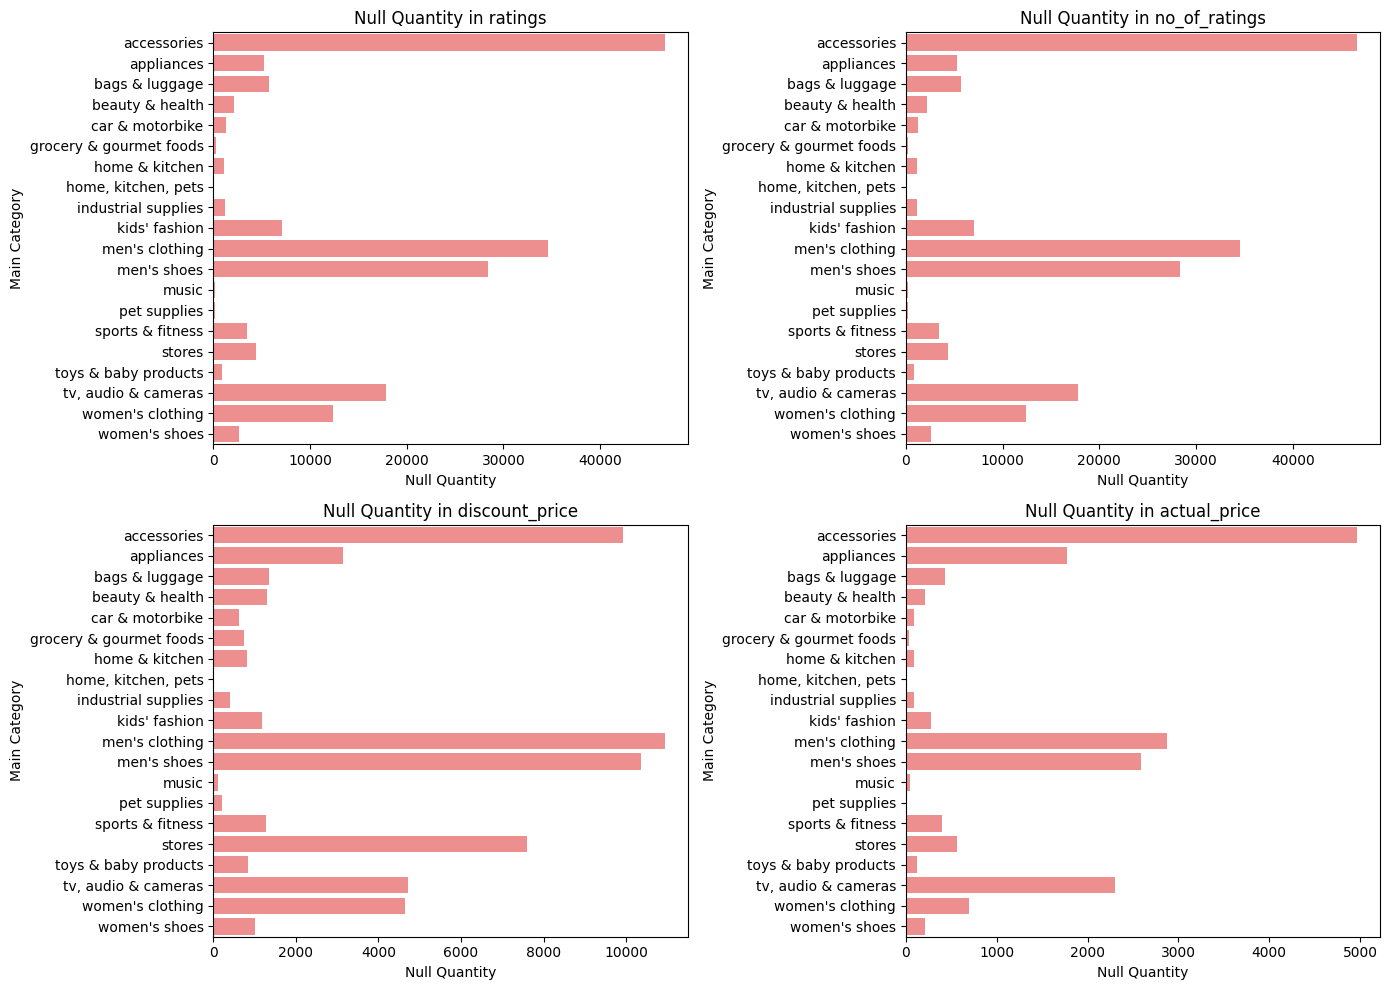

In [10]:
# Configuration of the grid for the plots (2x2)
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))

# Iterate over the null columns and plot them
for idx, col in enumerate(null_columns):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = axes[row, col_idx]
    
    # Calculate the number of null values by category
    null_counts_byCategory = null_data.groupby('main_category')[col].apply(lambda x: x.isnull().sum())
    df_null_byCategory = pd.DataFrame(null_counts_byCategory).rename(columns={col: 'Null Quantity'})
    
    # Create the bar plot
    sns.barplot(data=df_null_byCategory, y=df_null_byCategory.index, x='Null Quantity', alpha=0.5, color='r', ax=ax)
    ax.set_title(f'Null Quantity in {col}')
    ax.set_xlabel('Null Quantity')
    ax.set_ylabel('Main Category')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

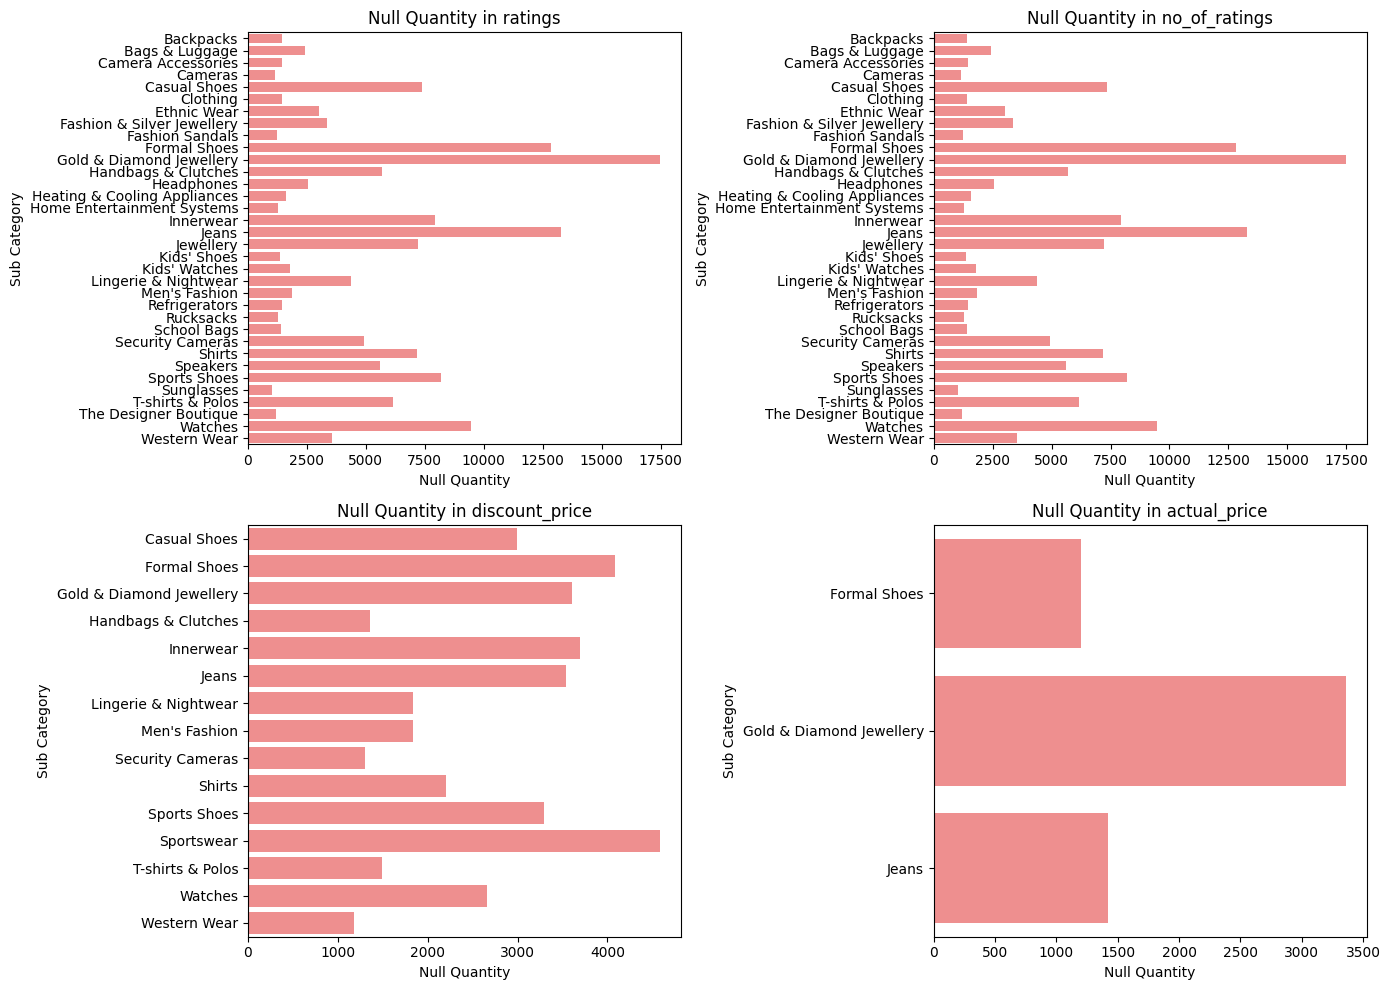

In [11]:
# Configuration of the grid for the plots (2x2)
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))

# Iterate over the null columns and plot them
for idx, col in enumerate(null_columns):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = axes[row, col_idx]
    
    # Calculate the number of null values by category
    null_counts_SubCategory = null_data.groupby('sub_category')[col].apply(lambda x: x.isnull().sum())
    df_nullSubCategory = pd.DataFrame(null_counts_SubCategory).rename(columns={col: 'Null Quantity'})
    df_nullSubCategory_filltered = df_nullSubCategory[df_nullSubCategory['Null Quantity'] > 1000]
    
    # Create the bar plot
    sns.barplot(data=df_nullSubCategory_filltered, y=df_nullSubCategory_filltered.index, x='Null Quantity', alpha=0.5, color='r', ax=ax)
    ax.set_title(f'Null Quantity in {col}')
    ax.set_xlabel('Null Quantity')
    ax.set_ylabel('Sub Category')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

## Dropping Missing Data 

In [12]:
cleaned_data = null_data.copy()

In [13]:
cleaned_data.dropna(inplace=True)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340680 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      340680 non-null  int64 
 1   name            340680 non-null  object
 2   main_category   340680 non-null  object
 3   sub_category    340680 non-null  object
 4   image           340680 non-null  object
 5   link            340680 non-null  object
 6   ratings         340680 non-null  object
 7   no_of_ratings   340680 non-null  object
 8   discount_price  340680 non-null  object
 9   actual_price    340680 non-null  object
dtypes: int64(1), object(9)
memory usage: 28.6+ MB


In [14]:
cleaned_data.head(3)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"


## Handling Numeric Columns with Object Dtype

In [15]:
transforming_to_numeric = cleaned_data.copy()

In [16]:
numeric_columns = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price']

In [17]:
# Convert the specified columns to numeric, handling errors by coercing invalid parsing to NaN
for col in numeric_columns:
    transforming_to_numeric[col] = pd.to_numeric(transforming_to_numeric[col], errors='coerce')

transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340680 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      340680 non-null  int64  
 1   name            340680 non-null  object 
 2   main_category   340680 non-null  object 
 3   sub_category    340680 non-null  object 
 4   image           340680 non-null  object 
 5   link            340680 non-null  object 
 6   ratings         334963 non-null  float64
 7   no_of_ratings   307518 non-null  float64
 8   discount_price  0 non-null       float64
 9   actual_price    0 non-null       float64
dtypes: float64(4), int64(1), object(5)
memory usage: 28.6+ MB


In [18]:
cleaned_data.head(3)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"


In [19]:
first_2_numeric_columns = ['ratings', 'no_of_ratings']
for col in first_2_numeric_columns:
    # Convert the column to numeric, coercing errors to NaN
    numeric_values = pd.to_numeric(cleaned_data[col], errors='coerce')
    
    # Select non-numeric values
    non_numeric_values = cleaned_data[col][numeric_values.isnull()]
    
    # Print non-numeric values
    print(f"The column {col} has the following non-numeric values:")
    print(non_numeric_values.unique())

The column ratings has the following non-numeric values:
['Get' 'FREE' '₹65' '₹70' '₹100' '₹99' '₹2.99']
The column no_of_ratings has the following non-numeric values:
['2,255' '2,948' '1,206' ... '55,051' '3,329' '7,141']


In [20]:
# List of non-numeric values
ratings_no_numeric_values = ['Get', 'FREE', '₹65', '₹70', '₹100', '₹99', '₹2.99']

# Filter the "ratings" column to select only values in ratings_no_numeric_values
filtered_ratings = cleaned_data[cleaned_data['ratings'].isin(ratings_no_numeric_values)]

# Count how many times each value appears and calculate percentage
percenatage_value_counts = ((filtered_ratings['ratings'].value_counts()) / len(cleaned_data)) * 100

# Print the result
print("Percentage of each value from 'ratings_no_numeric_values' in the 'ratings' column:")
print(percenatage_value_counts)

Percentage of each value from 'ratings_no_numeric_values' in the 'ratings' column:
ratings
Get      1.279500
FREE     0.391863
₹99      0.004109
₹70      0.001468
₹2.99    0.000587
₹65      0.000294
₹100     0.000294
Name: count, dtype: float64


In [21]:
transforming_to_numeric = cleaned_data.copy()

In [22]:
transforming_to_numeric = transforming_to_numeric[~transforming_to_numeric['ratings'].isin(ratings_no_numeric_values)]
transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334963 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      334963 non-null  int64 
 1   name            334963 non-null  object
 2   main_category   334963 non-null  object
 3   sub_category    334963 non-null  object
 4   image           334963 non-null  object
 5   link            334963 non-null  object
 6   ratings         334963 non-null  object
 7   no_of_ratings   334963 non-null  object
 8   discount_price  334963 non-null  object
 9   actual_price    334963 non-null  object
dtypes: int64(1), object(9)
memory usage: 28.1+ MB


In [23]:
transforming_to_numeric['ratings'] = pd.to_numeric(transforming_to_numeric['ratings'], errors='coerce')
transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334963 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      334963 non-null  int64  
 1   name            334963 non-null  object 
 2   main_category   334963 non-null  object 
 3   sub_category    334963 non-null  object 
 4   image           334963 non-null  object 
 5   link            334963 non-null  object 
 6   ratings         334963 non-null  float64
 7   no_of_ratings   334963 non-null  object 
 8   discount_price  334963 non-null  object 
 9   actual_price    334963 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 28.1+ MB


In [24]:
# Attempt to convert each value to a numeric type
non_numeric_values = transforming_to_numeric['no_of_ratings'].apply(pd.to_numeric, errors='coerce')

# Select values that couldn't be converted correctly
text_values = transforming_to_numeric['no_of_ratings'][non_numeric_values.isnull()]

# Print the values that are truly text or object
print("Text or object values in 'no_of_ratings' column:")
print(text_values.unique())

Text or object values in 'no_of_ratings' column:
['2,255' '2,948' '1,206' ... '55,051' '3,329' '7,141']


In [25]:
transforming_to_numeric["no_of_ratings"] = transforming_to_numeric["no_of_ratings"].str.replace(',', '').astype(float)
transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334963 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      334963 non-null  int64  
 1   name            334963 non-null  object 
 2   main_category   334963 non-null  object 
 3   sub_category    334963 non-null  object 
 4   image           334963 non-null  object 
 5   link            334963 non-null  object 
 6   ratings         334963 non-null  float64
 7   no_of_ratings   334963 non-null  float64
 8   discount_price  334963 non-null  object 
 9   actual_price    334963 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 28.1+ MB


In [26]:
# Removing the ₹ sign
transforming_to_numeric["discount_price"] = transforming_to_numeric["discount_price"].str.split(" ", expand = True).get(0).str.split("₹", expand = True).get(1)
transforming_to_numeric["actual_price"] = transforming_to_numeric["actual_price"].str.split(" ", expand = True).get(0).str.split("₹", expand = True).get(1)

In [27]:
# Change commas to dots and change the type to float
transforming_to_numeric['discount_price'] = transforming_to_numeric["discount_price"].str.replace(',', '').astype(float)
transforming_to_numeric["actual_price"] = transforming_to_numeric["actual_price"].str.replace(',', '').astype(float)

In [28]:
transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334963 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      334963 non-null  int64  
 1   name            334963 non-null  object 
 2   main_category   334963 non-null  object 
 3   sub_category    334963 non-null  object 
 4   image           334963 non-null  object 
 5   link            334963 non-null  object 
 6   ratings         334963 non-null  float64
 7   no_of_ratings   334963 non-null  float64
 8   discount_price  334963 non-null  float64
 9   actual_price    334963 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 28.1+ MB
